#**Mini Project 3: Unemployment Rates by Race**

# RPAD 676: Data Science for the Public Good

## Author: Leanna Zilles
## Date: 5/14/25

## Import Libraries and Clean Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Load and clean dataset
df = pd.read_csv("Labor_Force_Status_by_Race_and_Ethnicity__Beginning_2012_20250514.csv")
df.columns = df.columns.str.strip()
nys_df = df[df["Region"] == "New York State"].copy()

## Identify and Plot Unemployment Rate Gaps and Volatility

<ipython-input-4-25e0a605a7cc>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-4-25e0a605a7cc>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trend_volatility, x="Std Dev (Volatility)", y="Group", palette="coolwarm", ax=ax2)
<ipython-input-4-25e0a605a7cc>:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


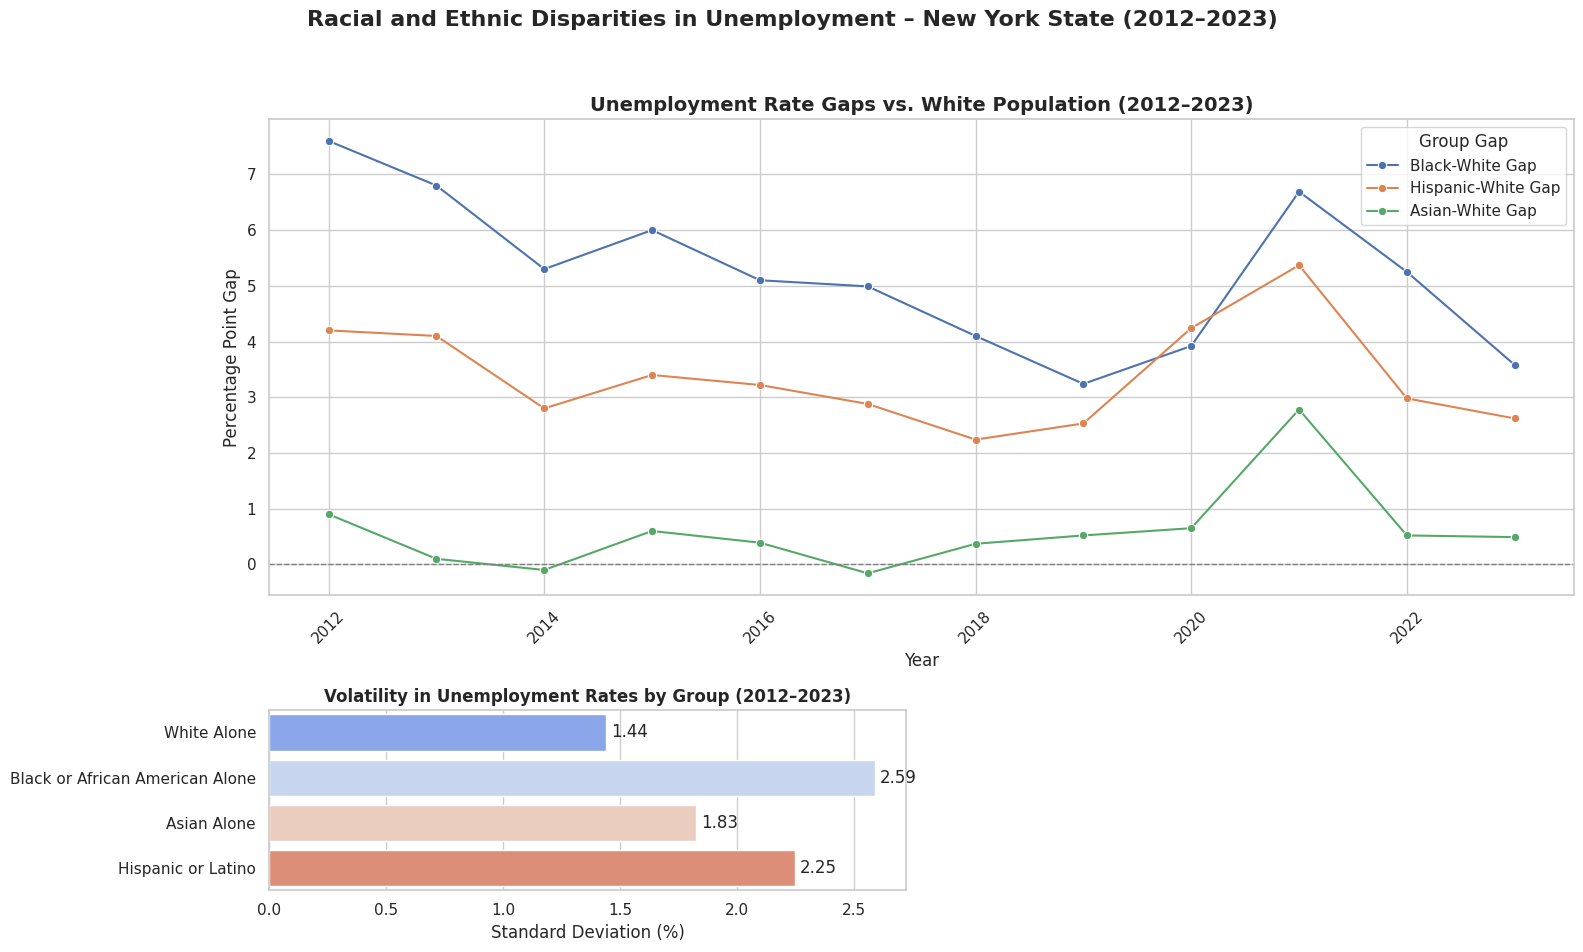

In [4]:
# Compute unemployment rate gaps vs. White population
nys_df["Black-White Gap"] = nys_df["Black or African American Alone Unemployment Rate"] - nys_df["White Alone Unemployment Rate"]
nys_df["Hispanic-White Gap"] = nys_df["Hispanic or Latino Unemployment Rate"] - nys_df["White Alone Unemployment Rate"]
nys_df["Asian-White Gap"] = nys_df["Asian Alone Unemployment Rate"] - nys_df["White Alone Unemployment Rate"]

# Prepare data for line plot (gap trends)
gap_data = nys_df[["Year", "Black-White Gap", "Hispanic-White Gap", "Asian-White Gap"]]
gap_data_melted = gap_data.melt(id_vars="Year", var_name="Group Gap", value_name="Gap Value")

# Prepare volatility data
unemployment_data = nys_df[[
    "Year",
    "White Alone Unemployment Rate",
    "Black or African American Alone Unemployment Rate",
    "Asian Alone Unemployment Rate",
    "Hispanic or Latino Unemployment Rate"
]]
trend_volatility = unemployment_data.drop(columns="Year").std().reset_index()
trend_volatility.columns = ["Group", "Std Dev (Volatility)"]
trend_volatility["Group"] = trend_volatility["Group"].str.replace(" Unemployment Rate", "")

# Set visual style
sns.set(style="whitegrid")

# Create dashboard layout
fig = plt.figure(constrained_layout=True, figsize=(16, 10))
gs = GridSpec(3, 2, figure=fig)

## Gap trends over time ##
ax1 = fig.add_subplot(gs[0:2, :])
sns.lineplot(data=gap_data_melted, x="Year", y="Gap Value", hue="Group Gap", marker="o", ax=ax1)
ax1.axhline(0, color="gray", linestyle="--", linewidth=1)
ax1.set_title("Unemployment Rate Gaps vs. White Population (2012–2023)", fontsize=14, weight="bold")
ax1.set_ylabel("Percentage Point Gap")
ax1.set_xlabel("Year")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(True)

## Volatility (standard deviation) ##
ax2 = fig.add_subplot(gs[2, 0])
sns.barplot(data=trend_volatility, x="Std Dev (Volatility)", y="Group", palette="coolwarm", ax=ax2)
for i, row in trend_volatility.iterrows():
    ax2.text(row["Std Dev (Volatility)"] + 0.02, i, f'{row["Std Dev (Volatility)"]:.2f}', va='center')
ax2.set_title("Volatility in Unemployment Rates by Group (2012–2023)", fontsize=12, weight="bold")
ax2.set_xlabel("Standard Deviation (%)")
ax2.set_ylabel("")

# Dashboard title #
plt.suptitle("Racial and Ethnic Disparities in Unemployment – New York State (2012–2023)", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Assess and Plot Unemployment Race/Ethnicity Gaps by Region

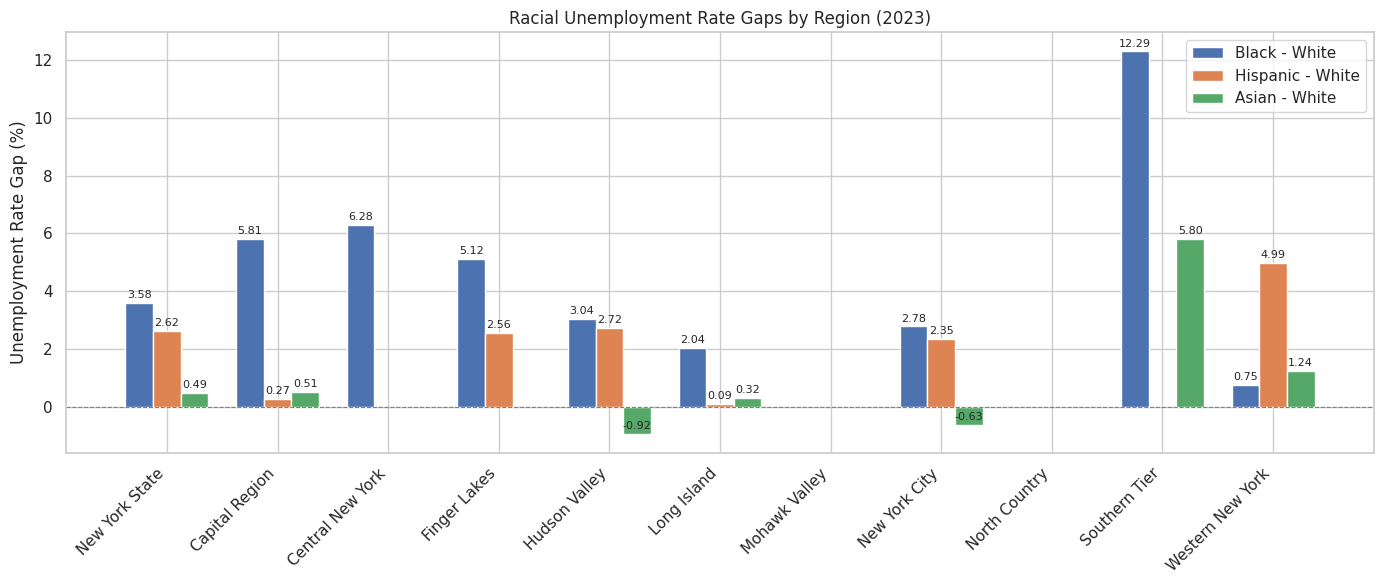

In [3]:
# Load the dataset
file_path = "Labor_Force_Status_by_Race_and_Ethnicity__Beginning_2012_20250514.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = [col.strip() for col in df.columns]

# Keep only the most recent year (e.g., 2023)
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year].copy()

# Calculate racial unemployment rate gaps
df_latest['Black_White_Gap'] = df_latest['Black or African American Alone Unemployment Rate'] - df_latest['White Alone Unemployment Rate']
df_latest['Hispanic_White_Gap'] = df_latest['Hispanic or Latino Unemployment Rate'] - df_latest['White Alone Unemployment Rate']
df_latest['Asian_White_Gap'] = df_latest['Asian Alone Unemployment Rate'] - df_latest['White Alone Unemployment Rate']

# Define x-axis positions
regions = df_latest['Region']
x = range(len(regions))
bar_width = 0.25

# Create figure
plt.figure(figsize=(14, 6))

# Plot bars
bars_black = plt.bar([i - bar_width for i in x], df_latest['Black_White_Gap'], width=bar_width, label='Black - White')
bars_hispanic = plt.bar(x, df_latest['Hispanic_White_Gap'], width=bar_width, label='Hispanic - White')
bars_asian = plt.bar([i + bar_width for i in x], df_latest['Asian_White_Gap'], width=bar_width, label='Asian - White')

# Add data labels to each bar
for bars in [bars_black, bars_hispanic, bars_asian]:
    for bar in bars:
        height = bar.get_height()
        if pd.notnull(height):
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{height:.2f}",
                     ha='center', va='bottom', fontsize=8)

# Customize axes and labels
plt.xticks(ticks=x, labels=regions, rotation=45, ha='right')
plt.ylabel("Unemployment Rate Gap (%)")
plt.title("Racial Unemployment Rate Gaps by Region (2023)")
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()